In [1]:
import os
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely import wkt
# from pygmo import hypervolume
# import pygmo as pg
# from pathlib2 import Path
import geopandas as gpd
# from scipy.optimize import curve_fit

In [2]:
def pre_read():
#     如果报错记得检查文件路径
    print('pre read')
    with open("./DATA/real_life_case_network/prepared/upstream_set.pkl", "rb") as tf:
        upstream_set = pickle.load(tf)
    tf.close()
    with open("./DATA/real_life_case_network/prepared/upstream_arr.pkl", "rb") as tf:
        upstream_arr = pickle.load(tf)
    tf.close()
    with open("./DATA/real_life_case_network/prepared/upstream_links_set.pkl", "rb") as tf:
        upstream_links_set = pickle.load(tf)
    tf.close()

    fn = './DATA/real_life_case_network/prepared/pipe_TM_clean_relabel.pkl'
    relabeled_G = nx.read_gpickle(fn)

    mapping_file = open('./DATA/real_life_case_network/prepared/label_mapping.pkl',
                        'rb')  # 以二进制读模式（rb）打开pkl文件
    data = pickle.load(mapping_file)  # 读取存储的pickle文件
    pos_data = dict(zip(data.values(), data.keys()))

    return upstream_arr, upstream_set,upstream_links_set, relabeled_G, pos_data
upstream_arr, upstream_set,upstream_links_set, relabeled_G, pos_data = pre_read()

def solution_to_objective_values(solution):
    # extract objective values from solution
    objective_values = []
    objective_values.extend([individual[1:3] for individual in solution])
    objective_values = np.array(objective_values)
    return objective_values

def cal_norm_para(min_max_df):
    coverage_min=min_max_df['coverage'].min()
    coverage_max=min_max_df['coverage'].max()
    resolution_min=min_max_df['resolution'].min()
    resolution_max=min_max_df['resolution'].max()
    norm_params={'coverage':[coverage_min,coverage_max],
            'resolution':[resolution_min,resolution_max]}
    return norm_params

def normalize(values, norm_params, col):
    mini, maxi = norm_params[col]
    return (values - mini)/(maxi - mini)

ref_point=[1,1]

pre read


In [18]:
fn='.//TESTOUTPUT//synthetic_case//greedy_new//100//0//max_sensor_10_Lmax_20_new_plans_5//4//population.pkl'
with open(fn, "rb") as tf:
    solution = pickle.load(tf)
solution

{0: [[1, -1, 0.0, [65]],
  [1, -1, 0.0, [40]],
  [1, -98, 6.614709844115209, [2]],
  [1, -59, 5.882643049361842, [21]],
  [1, -36, 5.169925001442312, [25]],
  [1, -77, 6.266786540694902, [5]],
  [1, -19, 4.247927513443585, [34]],
  [1, -28, 4.807354922057604, [32]],
  [1, -2, 1.0, [39]],
  [1, -13, 3.7004397181410917, [63]],
  [1, -10, 3.3219280948873626, [83]],
  [1, -2, 1.0, [74]],
  [1, -3, 1.5849625007211563, [50]],
  [1, -7, 2.807354922057604, [43]],
  [1, -73, 6.189824558880018, [7]],
  [1, -15, 3.9068905956085187, [38]],
  [1, -3, 1.5849625007211563, [96]],
  [1, -4, 2.0, [68]],
  [1, -31, 4.954196310386876, [29]],
  [1, -9, 3.1699250014423126, [84]]],
 1: [[2, -2, 0.0, [65, 75]],
  [2, -100, 5.788405379214593, [0, 32]],
  [2, -59, 4.899493921133554, [21, 27]],
  [2, -44, 4.583768226314258, [29, 63]],
  [2, -89, 5.553737727871958, [4, 21]],
  [2, -37, 4.209980345442966, [34, 62]],
  [2, -70, 5.129871952206211, [10, 25]],
  [2, -4, 1.1887218755408673, [65, 96]],
  [2, -76, 5.5312

# synthetic case

In [27]:
# read time.txt file,修改new_plans
sizes=[100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000]
for size in sizes:
    max_sensor=int(size/10)
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_30//0//time.txt'
    f=open(path_new,'r')
    print(round(float(f.read()),2))

9.25
33.26
60.26
91.56
96.81
150.66
186.13
223.31
253.49
330.49
685.55
1190.3
1951.67
3052.6


In [24]:
# read time.txt file,修改new_plans
sizes=[100,200,300,400,500,600,700,800,900,1000] #,1500,2000,2500,3000]
for size in sizes:
    max_sensor=int(size/10)
    path_new='.//TESTOUTPUT//synthetic_case//greedy_original//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20//0//time.txt'
    f=open(path_new,'r')
    print(round(float(f.read()),2))

60.69
733.61
2532.55
6176.07
13503.35
19734.28
31385.43
45900.06
64501.67
113634.28


#### when OG cannot generate solution

In [15]:
# new greedy result to get the min_max_df, network size from 1500-3000
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]
size=3000
max_sensor=int(size/10)
for new_plans in new_plans_all:
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)

    obj_new=solution_to_objective_values(result_new)
    obj_new_df=pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_new_df)

norm_params=cal_norm_para(min_max_df)
norm_params


<ipython-input-15-1fa07bb72707>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-1fa07bb72707>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-1fa07bb72707>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-1fa07bb72707>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-1fa07bb72707>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'coverage': [-3000.0, -300.0], 'resolution': [0.0, 3.5998760533901106]}

In [16]:
for new_plans in new_plans_all:
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)
    obj_new=solution_to_objective_values(result_new)
    obj_norm=obj_new.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj_new[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', hv)
    print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

new_plans: 5 hv: 0.1503408570226929
HV for new greedy with 5 new plans generated and network size of 3000 is 0.15.
new_plans: 10 hv: 0.20922770896493614
HV for new greedy with 10 new plans generated and network size of 3000 is 0.209.
new_plans: 15 hv: 0.24137334465349108
HV for new greedy with 15 new plans generated and network size of 3000 is 0.241.
new_plans: 20 hv: 0.25215169132322396
HV for new greedy with 20 new plans generated and network size of 3000 is 0.252.
new_plans: 25 hv: 0.2619627745149813
HV for new greedy with 25 new plans generated and network size of 3000 is 0.262.
new_plans: 30 hv: 0.2496893944714817
HV for new greedy with 30 new plans generated and network size of 3000 is 0.25.


#### when OG can generaete solution

In [15]:
# network size : 100, 500, 1000
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]
size=900
max_sensor=int(size/10)
for new_plans in new_plans_all:   
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)

    obj_new=solution_to_objective_values(result_new)
    obj_new_df=pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_new_df)

path_original='.//TESTOUTPUT//synthetic_case//greedy_original//'+str(size)+'//0//'+'max_sensor_' + str(max_sensor) + '_Lmax_20'+'//0//solution.pkl'
with open(path_original, 'rb') as f:
    greedy_original = pickle.load(f)

n=len(greedy_original)
result_original=greedy_original[n-1]

obj_original=solution_to_objective_values(result_original)
obj_original_df=pd.DataFrame(obj_original, columns=['coverage', 'resolution'])
min_max_df=min_max_df.append(obj_original_df)

norm_params=cal_norm_para(min_max_df)
norm_params

<ipython-input-15-2af54c0ed6ac>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-2af54c0ed6ac>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-2af54c0ed6ac>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-2af54c0ed6ac>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-15-2af54c0ed6ac>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

{'coverage': [-900.0, -90.0], 'resolution': [0.0, 3.6251934465714655]}

In [16]:
for new_plans in new_plans_all:
    max_sensor=int(size/10)
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)
    obj_new=solution_to_objective_values(result_new)
    obj_norm=obj_new.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj_new[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', hv)
    print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

obj_norm=obj_original.copy()  # obj should be array
for i in range(2):
    obj_norm[:,i]=normalize(obj_original[:,i], norm_params, ['coverage', 'resolution'][i])
hv=pg.hypervolume(obj_norm).compute(ref_point)
print('HV for original greedy with network size of {} is {}.'.format(size,round(hv,3)))

new_plans: 5 hv: 0.18459288873326915
HV for new greedy with 5 new plans generated and network size of 900 is 0.185.
new_plans: 10 hv: 0.2202921867953848
HV for new greedy with 10 new plans generated and network size of 900 is 0.22.
new_plans: 15 hv: 0.2631636600807501
HV for new greedy with 15 new plans generated and network size of 900 is 0.263.
new_plans: 20 hv: 0.26289442174995103
HV for new greedy with 20 new plans generated and network size of 900 is 0.263.
new_plans: 25 hv: 0.25277864184082355
HV for new greedy with 25 new plans generated and network size of 900 is 0.253.
new_plans: 30 hv: 0.2765613710625661
HV for new greedy with 30 new plans generated and network size of 900 is 0.277.
HV for original greedy with network size of 900 is 0.301.


# real-world case

#### time and HV

In [4]:
# 时间
new_plans_all=[5,10,15,20,25,30]
for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//time.txt'
    f=open(path,'r')
    print(round(float(f.read()),2))

31.07
72.55
121.49
178.7
235.17
327.76


In [19]:
# HV
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]

for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path, 'rb') as f:
        result = pickle.load(f)

    obj=solution_to_objective_values(result)
    obj_df=pd.DataFrame(obj, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_df)

norm_params=cal_norm_para(min_max_df)
norm_params

<ipython-input-19-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-19-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-19-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-19-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-19-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

{'coverage': [-4204.0, -100.0], 'resolution': [0.0, 6.537459549227607]}

In [20]:
for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path, 'rb') as f:
        result = pickle.load(f)
    obj=solution_to_objective_values(result)
    obj_norm=obj.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', round(hv,3))
    # print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

new_plans: 5 hv: 0.222
new_plans: 10 hv: 0.24
new_plans: 15 hv: 0.258
new_plans: 20 hv: 0.272
new_plans: 25 hv: 0.282
new_plans: 30 hv: 0.276


#### pareto front

In [3]:
# 读取数据
path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100_Lmax_20_new_plans_25//0//final_solution.pkl'
with open(path,'rb') as f:
    data=pickle.load(f)

In [4]:
obj=solution_to_objective_values(data)
obj_df=pd.DataFrame(obj,columns=['coverage','resolution'])

In [41]:
# obj保存为csv，在csv中画拟合的曲线
# path='.//post-analysis-result//real_case_solution.csv'
# obj_df.to_csv(path)


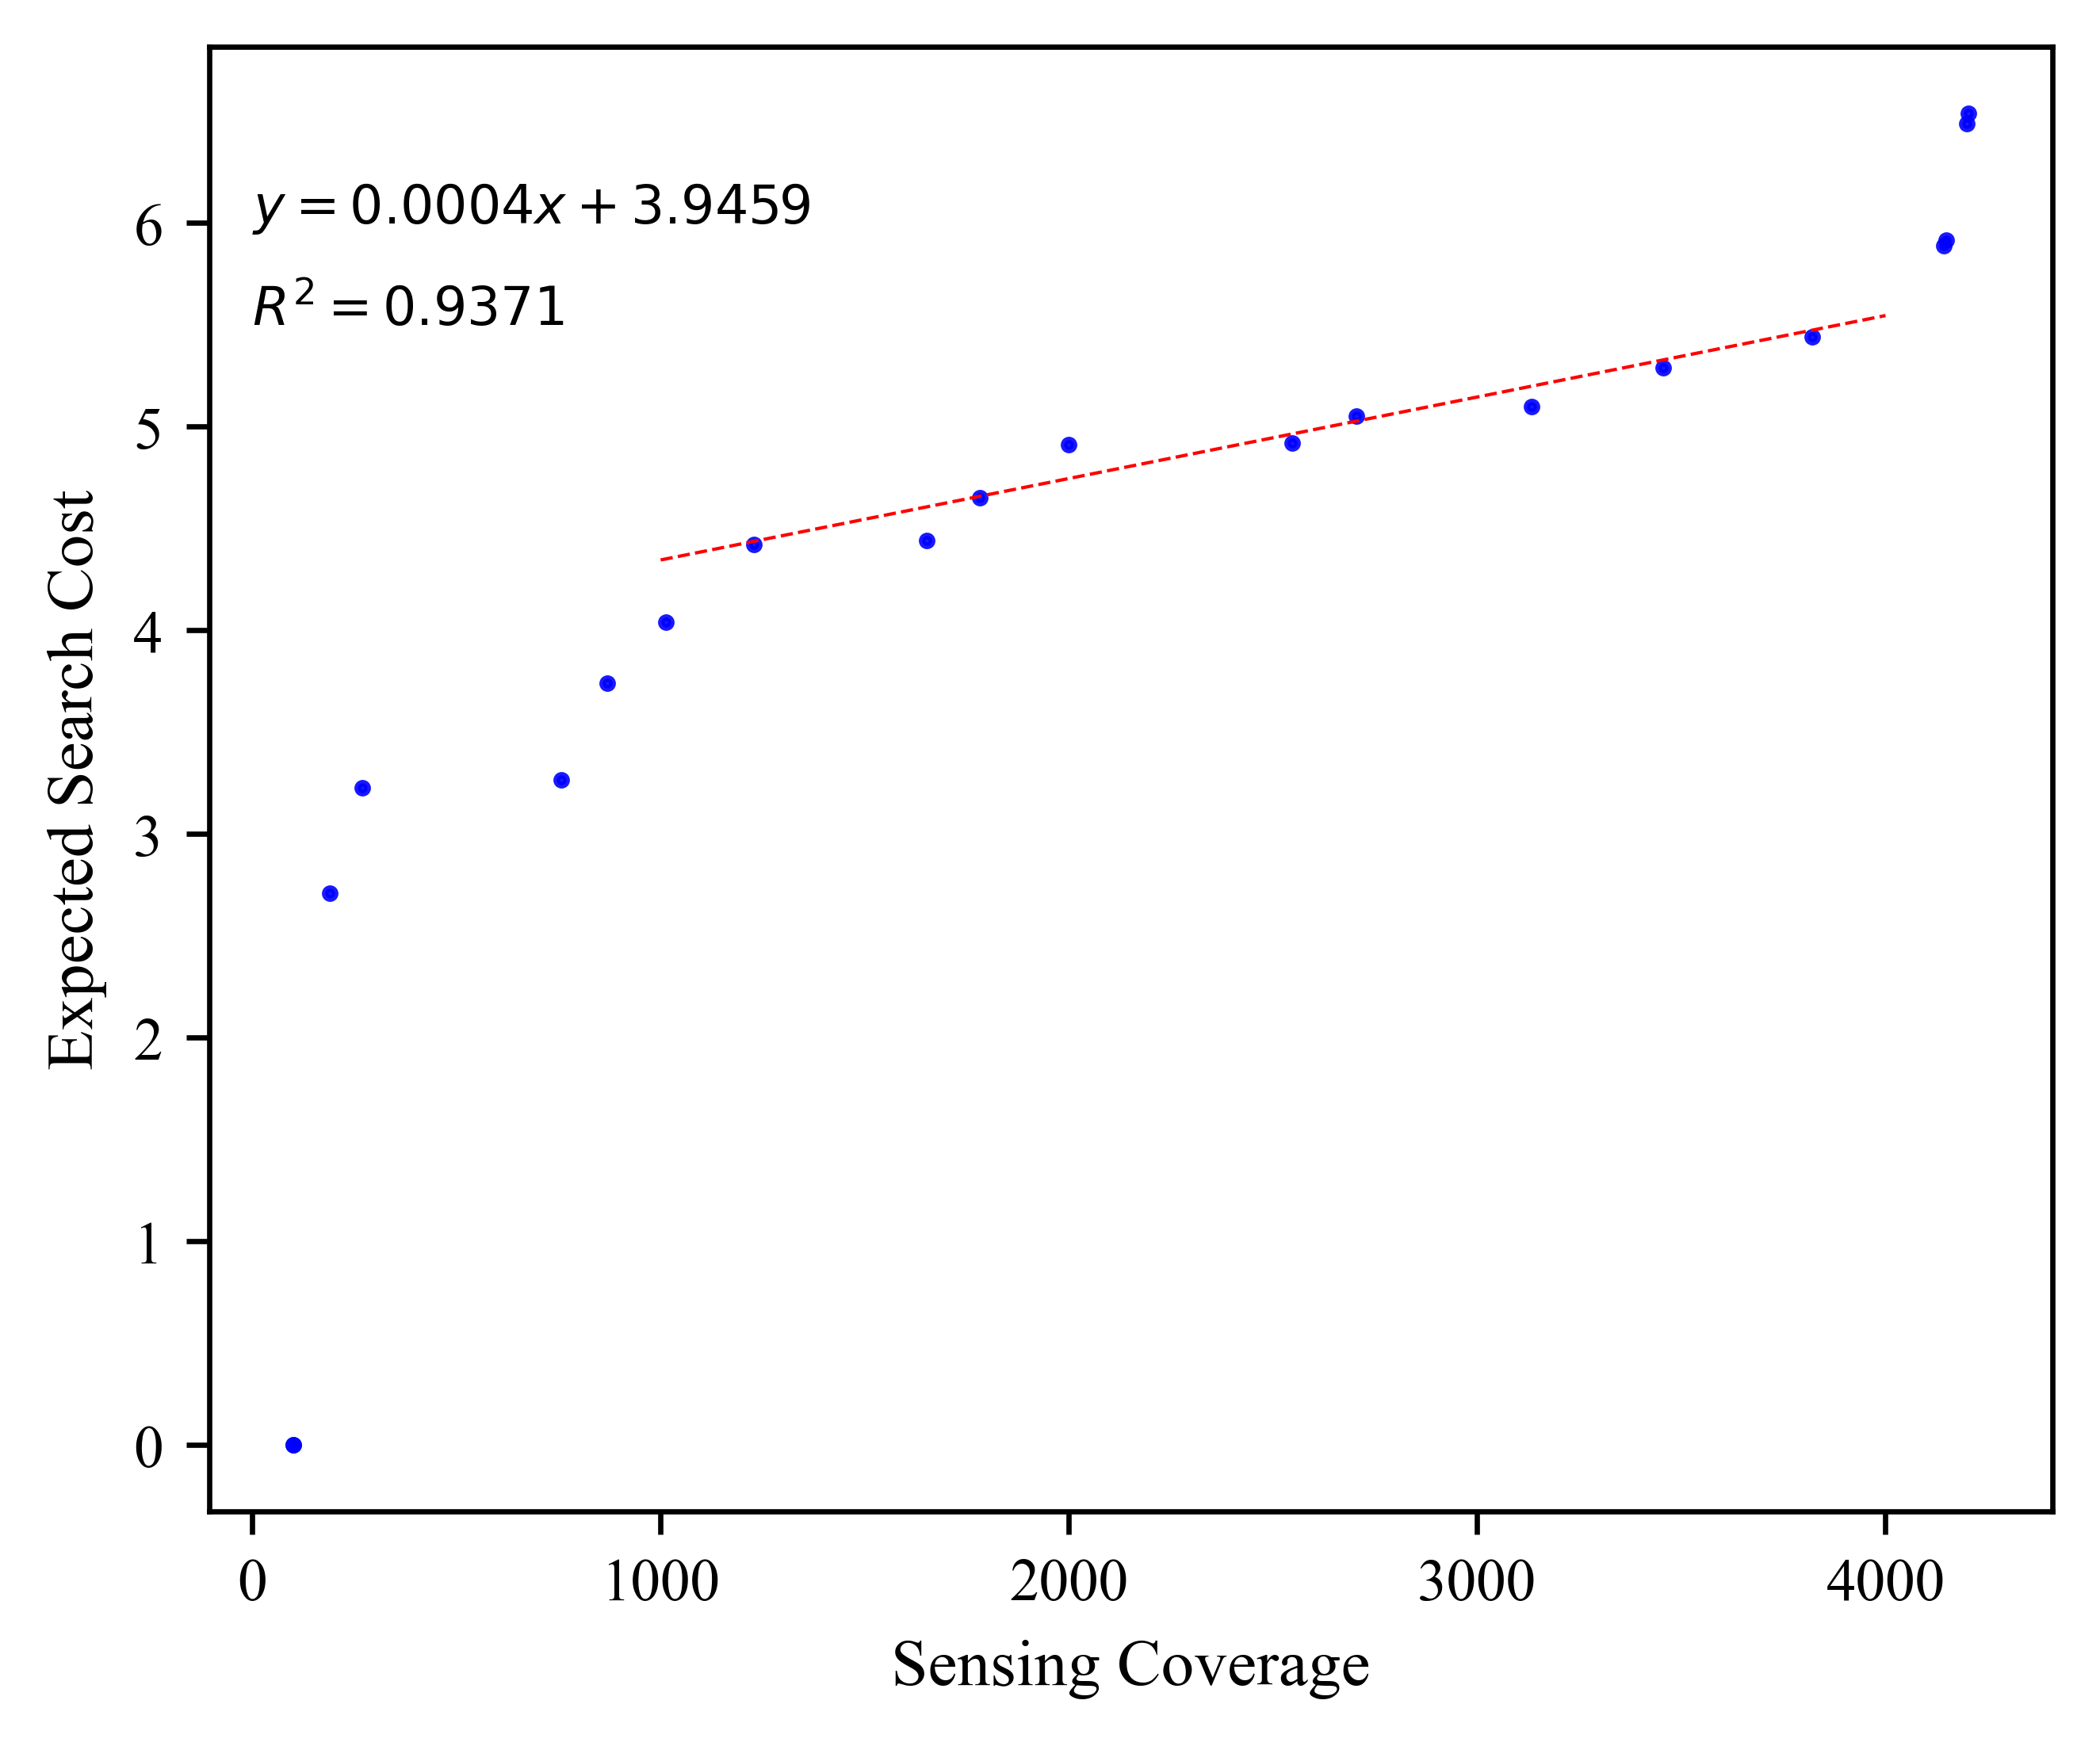

In [16]:
# 画图，obj第一列为x-axis，第二列为y-axis，画scatter plot
# 加一条虚线，y=0.0004x+3.9459, R2=0.9371
fig, ax = plt.subplots(figsize=(5, 4), dpi=600)
ax.plot(-obj[:,0], obj[:,1], 'bo', alpha=.9, markersize=1.5)
#ax.plot([0.0004, 0.0016], [3.9459, 5.5], 'r--', linewidth=0.5)
x=np.linspace(1000, 4000,100)
ax.plot(x, 0.0004*x+3.9459, 'r--', linewidth=0.5)
# 写上拟合的直线方程和R2
ax.text(0.001, 6, '$y=0.0004x+3.9459$', fontname='Times New Roman', fontsize=8)
ax.text(0.001, 5.5, '$R^2=0.9371$', fontname='Times New Roman', fontsize=8)
ax.set_xlabel('Sensing Coverage', fontname='Times New Roman', fontsize=10)
ax.set_ylabel('Expected Search Cost', fontname='Times New Roman', fontsize=10)
plt.xticks(fontname='Times New Roman', fontsize=9)
plt.yticks(fontname='Times New Roman', fontsize=9)
plt.grid(False)
plt.show()


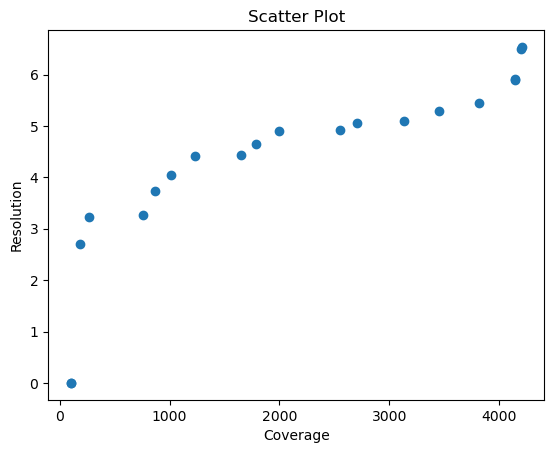

In [23]:
# cost-effective plot, x-axis is coverage, y-axis is resolution
plt.scatter(-obj_df['coverage'], obj_df['resolution'])
plt.xlabel('Coverage')
plt.ylabel('Resolution')
plt.title('Scatter Plot')
plt.show()

#### select one solution：coverage最大

In [7]:
coverage=int(obj_df['coverage'].min())

In [8]:
for ind in data:
    if ind[1]==coverage:
        sol_example=ind

In [26]:
sol_example

[100,
 -4204,
 6.537459549227607,
 [20,
  37,
  57,
  92,
  100,
  108,
  160,
  230,
  252,
  279,
  281,
  357,
  383,
  413,
  464,
  617,
  715,
  848,
  950,
  1137,
  1143,
  1149,
  1171,
  1237,
  1245,
  1265,
  1299,
  1348,
  1364,
  1389,
  1455,
  1475,
  1510,
  1635,
  1636,
  1831,
  1956,
  2015,
  2016,
  2078,
  2083,
  2129,
  2187,
  2197,
  2312,
  2360,
  2368,
  2393,
  2464,
  2491,
  2527,
  2546,
  2600,
  2607,
  2649,
  2732,
  2749,
  2830,
  2834,
  2841,
  2845,
  2851,
  2852,
  2884,
  2887,
  3041,
  3092,
  3161,
  3180,
  3215,
  3242,
  3341,
  3358,
  3367,
  3371,
  3382,
  3389,
  3391,
  3528,
  3595,
  3651,
  3671,
  3681,
  3719,
  3737,
  3742,
  3770,
  3809,
  3852,
  3949,
  3996,
  4005,
  4073,
  4193,
  4224,
  4248,
  4325,
  4327,
  4340,
  4347]]

In [17]:
# 提取安置sensor的manhole
# 所有manhole的node
manhole=list(range(0, len(upstream_set)))
# 所有manhole标记都为0
mark=[0]*len(upstream_set)

# 提取出此solution中放置了sensor的manhole
sensor=sol_example[3]
# 对于被放置sensor的manhole，标记变为1
for node in sensor:
    mark[node]=1

# 将node与其标记连起来，形成一个dictionary
sensor_dictionary =  dict(zip(manhole, mark))

In [18]:
# 提取被cover的manhole，记录每个node被cover的次数
covered_node=[]
covered_times=[0]*len(upstream_set)
for node in sensor:
    covered_set=upstream_set[node]
    for j in covered_set:
        if j in covered_node:
            covered_times[j]+=1
        else:
            covered_times[j]=1
            covered_node.append(j)
# 将node与它被cover的次数连起来，形成一个dictionary
covered_node_dictionary =  dict(zip(manhole, covered_times))

In [19]:
# 给每个node加上是否被cover、被cover的次数、以及坐标
nx.set_node_attributes(relabeled_G,sensor_dictionary, "whether-selected")
nx.set_node_attributes(relabeled_G,covered_node_dictionary,'covered_times')
nx.set_node_attributes(relabeled_G,pos_data, "coordinate")

In [20]:
# 将node、选中次数、经纬度分别读取，成为list
node=[]
whether_covered=[]
covered_times=[]
coordinate=[]
for i in range(4394):
    node.append(i)
    whether_covered.append(relabeled_G.nodes[i]['whether-selected'])
    covered_times.append(relabeled_G.nodes[i]['covered_times'])
    coordinate.append(relabeled_G.nodes[i]['coordinate'])
    #print(relabeled_G.nodes[i])

# list转化为dataframe
node=pd.DataFrame(node,columns=['node'])
whether_covered=pd.DataFrame(whether_covered,columns=['whether_selected'])
covered_times=pd.DataFrame(covered_times,columns=['covered_times'])
coordinate=pd.DataFrame(coordinate,columns=['lon','lat'])

# 合并dataframe
final=pd.concat([node,whether_covered,covered_times,coordinate],axis=1)

In [21]:
gdf = gpd.GeoDataFrame(
    final, geometry=gpd.points_from_xy(final.lon,final.lat))
gdf.set_crs('epsg:2326')
gdf.to_file('./post-analysis-result/example-viz-data-new/node-max-coverage.shp')

C:\Users\user\AppData\Local\Temp\ipykernel_41520\2174046363.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./post-analysis-result/example-viz-data-new/node-max-coverage.shp')


In [22]:
# 提取被cover的edge以及每条edge被cover的次数
covered_edge={}
for node in sensor:
    covered_link_set=upstream_links_set[node] # 提取sensor上游的link
    for j in covered_link_set:  # 对cover的link遍历
        if j in covered_edge.keys():   # 已经存在，value+1
            covered_edge[j]+=1
        else:  # 不存在，加入且value=1
            covered_edge[j]=1

# 将边被cover的次数赋给每个edge
nx.set_edge_attributes(relabeled_G,covered_edge,'covered_times')

# 转化为dataframe
test=nx.to_pandas_edgelist(relabeled_G)
# 将没有被cover到的edge对应的covered_times设置为0
test=test.fillna(0)

In [23]:
# 设置geometry
test['geom'] = test['Wkt'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(test, geometry='geom')
# 无关的列直接去掉
gdf=gdf[['source','target','covered_times','geom']]
# 设置坐标
gdf=gdf.set_crs('epsg:2326')
gdf.to_file('./post-analysis-result/example-viz-data-new/edge-max-coverage.shp')

C:\Users\user\AppData\Local\Temp\ipykernel_41520\2819811131.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./post-analysis-result/example-viz-data-new/edge-max-coverage.shp')


# pre-analysis of London sewage pipes

In [11]:
#path='D://project//data//London_sewage_pop//sewer_pipes.shp'
path='.//DATA//real_life_case_network//data//pipe_TM.shp'
# networkx读取数据
G = nx.read_shp(path)

<ipython-input-11-8bf985849a5a>:4: DeprecationWarning: read_shp is deprecated and will be removed in 3.0.See https://networkx.org/documentation/latest/auto_examples/index.html#geospatial.
  G = nx.read_shp(path)


In [12]:
nx.is_directed(G)

True

In [13]:
nx.info(G)

<ipython-input-13-ed9cf5bce324>:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'DiGraph with 4394 nodes and 4309 edges'

In [14]:
G_undirected=G.to_undirected()

In [15]:
nx.is_connected(G_undirected)

False

In [16]:
# 检查多少个subgraph
subgraphs = list(nx.connected_components(G_undirected))
len(subgraphs)

103

# not used

In [ ]:

def HV_comparison(obj_new, obj_original):
    obj_new_df = pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    obj_original_df = pd.DataFrame(obj_original, columns=['coverage', 'resolution'])

    def cal_norm_para(obj_new_df, obj_original_df):
        min_max_df=pd.concat([obj_new_df, obj_original_df], ignore_index=True)
        coverage_min=min_max_df['coverage'].min()
        coverage_max=min_max_df['coverage'].max()
        resolution_min=min_max_df['resolution'].min()
        resolution_max=min_max_df['resolution'].max()
        norm_params={'coverage':[coverage_min,coverage_max],
               'resolution':[resolution_min,resolution_max]}
        return norm_params

    def normalize(values, norm_params, col):
        mini, maxi = norm_params[col]
        return (values - mini)/(maxi - mini)

    norm_params=cal_norm_para(obj_new_df, obj_original_df)

    def cal_HV(obj):
        ref_point=[1,1]
        obj_norm=obj.copy()  # obj should be array
        for i in range(2):
            obj_norm[:,i]=normalize(obj[:,i], norm_params, ['coverage', 'resolution'][i])
        hv=pg.hypervolume(obj_norm).compute(ref_point)
        return hv
    
    hv_new=cal_HV(obj_new)
    hv_original=cal_HV(obj_original)
    print('hv_new:', hv_new)
    print('hv_original:', hv_original)

    return hv_new, hv_original


In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [19]:
path='D://project//data//pipeTM_Adjust//pipeTM_Adjust//pipe_TM_Adjust_WGS84.shp'
# use geopandas
gdf = gpd.read_file(path)


In [20]:
gdf.to_crs('epsg:4326', inplace=True)

In [21]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
#pop_path='D://project//data//SSBG_16BC_84//SSBG_16BC_84//SSBG_16BC_84.shp'
pop_path='D://project//data//2016PopulationBycensusStatisticsBySmallStreetBlockGroup_SHP//SSBG_16BC.shp'
pop = gpd.read_file(pop_path)

In [23]:
pop.crs

<Projected CRS: EPSG:2326>
Name: Hong Kong 1980 Grid System
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: China - Hong Kong - onshore and offshore.
- bounds: (113.76, 22.13, 114.51, 22.58)
Coordinate Operation:
- name: Hong Kong 1980 Grid
- method: Transverse Mercator
Datum: Hong Kong 1980
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [24]:
pop.to_crs('epsg:4326', inplace=True)

In [25]:
pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

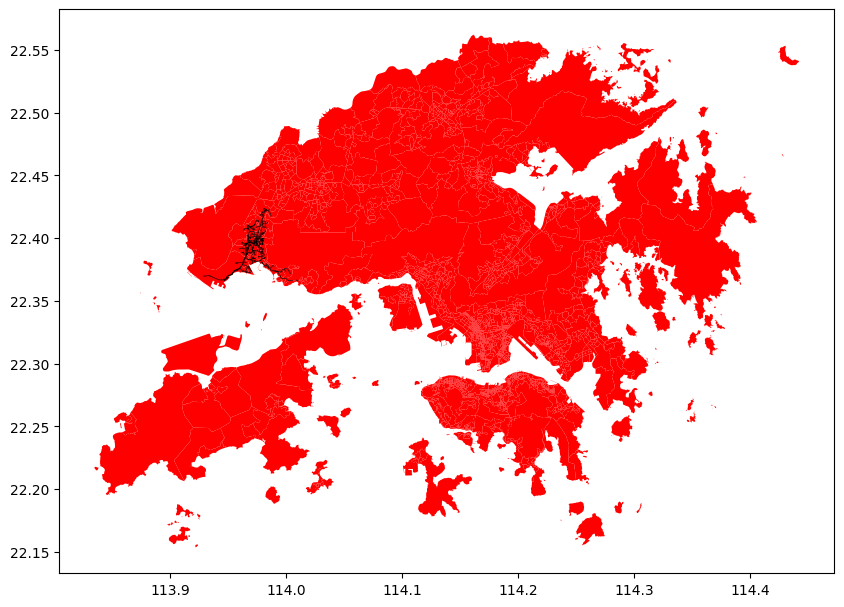

In [26]:
# 画图
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='black', linewidth=0.5)
pop.plot(ax=ax, color='red', markersize=1)
plt.show()